# DiploDatos 2020 - Coronavirus en Argentina

## En este Notebook se realizará el proceso de Limpieza, Pre-Procesado y Feature Engineer sobre el Dataset Covid19Casos

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Veamos unos sencillos (e incompletos) **ejemplos**.

### Carga de datos

In [2]:
# Importamos librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Experimentación con el dataset: Covid19Casos

##### Dataset - Covid19Casos
- Source: http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina/archivo/fd657d02-a33a-498b-a91b-2ef1a68b8d16

In [3]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'

df = pd.read_csv(url, error_bad_lines=False)

In [4]:
dataset = df.copy(deep=True)

In [5]:
dataset.head(10)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-11-01
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-11-01
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-11-01
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-11-01
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaN,515,2020-11-01
5,1000007,M,26.0,Años,Argentina,Formosa,Patiño,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-25,35,2020-11-01
6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,2020-06-01,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-11-01
7,1000009,M,73.0,Años,Argentina,Buenos Aires,Esteban Echeverría,Buenos Aires,2020-05-31,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,6,2020-06-02,260,2020-11-01
8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaN,2020-06-01,...,NaN,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7,2020-11-01
9,1000011,M,42.0,Años,Argentina,Santa Fe,Rosario,Santa Fe,NaN,2020-06-01,...,NaN,NO,82,Público,Caso Descartado,Descartado,82,2020-06-01,84,2020-11-01


In [6]:
dataset.shape

(2843278, 25)

In [7]:
dataset.isnull().count()

id_evento_caso                      2843278
sexo                                2843278
edad                                2843278
edad_años_meses                     2843278
residencia_pais_nombre              2843278
residencia_provincia_nombre         2843278
residencia_departamento_nombre      2843278
carga_provincia_nombre              2843278
fecha_inicio_sintomas               2843278
fecha_apertura                      2843278
sepi_apertura                       2843278
fecha_internacion                   2843278
cuidado_intensivo                   2843278
fecha_cui_intensivo                 2843278
fallecido                           2843278
fecha_fallecimiento                 2843278
asistencia_respiratoria_mecanica    2843278
carga_provincia_id                  2843278
origen_financiamiento               2843278
clasificacion                       2843278
clasificacion_resumen               2843278
residencia_provincia_id             2843278
fecha_diagnostico               

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843278 entries, 0 to 2843277
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [9]:
dataset['fecha_inicio_sintomas'] = pd.to_datetime(dataset['fecha_inicio_sintomas'], format='%Y-%m-%d')
dataset['fecha_apertura'] = pd.to_datetime(dataset['fecha_apertura'], format='%Y-%m-%d')
dataset['fecha_internacion'] = pd.to_datetime(dataset['fecha_internacion'], format='%Y-%m-%d')
dataset['fecha_cui_intensivo'] = pd.to_datetime(dataset['fecha_cui_intensivo'], format='%Y-%m-%d')
dataset['fecha_fallecimiento'] = pd.to_datetime(dataset['fecha_fallecimiento'], format='%Y-%m-%d')
dataset['fecha_diagnostico'] = pd.to_datetime(dataset['fecha_diagnostico'], format='%Y-%m-%d')

## Limpieza, Preprocesado y Feature Engineering

In [10]:
dataset.convert_dtypes().dtypes

id_evento_caso                               Int64
sexo                                        string
edad                                         Int64
edad_años_meses                             string
residencia_pais_nombre                      string
residencia_provincia_nombre                 string
residencia_departamento_nombre              string
carga_provincia_nombre                      string
fecha_inicio_sintomas               datetime64[ns]
fecha_apertura                      datetime64[ns]
sepi_apertura                                Int64
fecha_internacion                   datetime64[ns]
cuidado_intensivo                           string
fecha_cui_intensivo                 datetime64[ns]
fallecido                                   string
fecha_fallecimiento                 datetime64[ns]
asistencia_respiratoria_mecanica            string
carga_provincia_id                           Int64
origen_financiamiento                       string
clasificacion                  

### Sexo

F     1447872
M     1386303
NR       9103
Name: sexo, dtype: int64

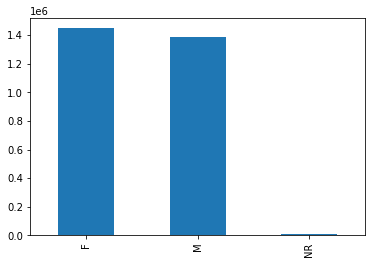

In [11]:
dataset.sexo.value_counts().plot.bar()
dataset.sexo.value_counts()

In [12]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['sexo'], prefix='sexo')],axis=1).drop(['sexo'], axis=1)

In [13]:
dataset = dataset.rename(columns={"sexo_F": "sexo_f", 
                                  "sexo_M": "sexo_m",
                                  "sexo_NR": "sexo_nr"})

### Edad

In [14]:
# Paso meses a años (cuando la edad está expresada en meses)
dataset['edad'].loc[dataset.edad_años_meses == 'Meses'] = 0

C:\Users\lucas\.conda\envs\diplodatos-iaa\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
# Eliminamos la columna edad_años_meses
dataset.drop(['edad_años_meses'], axis=1, inplace=True)

### Lugares

#### País

Argentina               2726547
SIN ESPECIFICAR          116261
Paraguay                    119
Bolivia                      99
Chile                        55
Brasil                       51
Uruguay                      36
Perú                         24
Italia                       15
Venezuela                     9
Alemania                      9
Francia                       8
España                        8
China                         5
Reino Unido                   4
Colombia                      4
Australia                     3
EE.UU.                        3
Austria                       2
Ecuador                       2
Filipinas                     2
Malasia                       2
Bélgica                       1
Líbano                        1
Portugal                      1
Irlanda                       1
Canadá                        1
Polonia                       1
Panamá                        1
Países Bajos                  1
Ucrania                       1
Repúblic

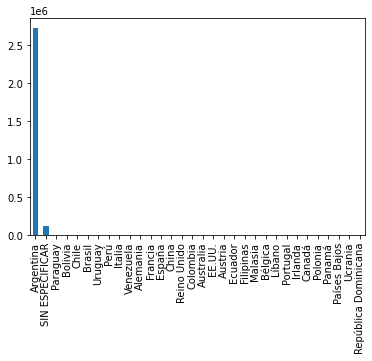

In [16]:
dataset.residencia_pais_nombre.value_counts().plot.bar()
dataset.residencia_pais_nombre.value_counts()

In [17]:
cant_total = dataset.shape[0]
cant_arg = dataset[dataset.residencia_pais_nombre == "Argentina"].shape[0]
porcentaje = (cant_arg * 100) / cant_total

print('Cantidad de registros donde el país de residencia es Argentina: {0} ({1}%)'.format(cant_arg, round(porcentaje, 2)))

Cantidad de registros donde el país de residencia es Argentina: 2726547 (95.89%)


- Se conservan sólo los datos de personas residentes en Argentina

In [18]:
dataset.drop(dataset[dataset.residencia_pais_nombre != "Argentina"].index, inplace=True)

In [19]:
#Elimino la columna país porque todos los registros tienen el mismo valor
dataset.drop(['residencia_pais_nombre'], axis=1, inplace=True)

#### carga_provincia_nombre

In [20]:
cant_iguales = dataset[dataset.residencia_provincia_nombre == dataset.carga_provincia_nombre].shape[0]
porcentaje = (cant_iguales * 100) / cant_total

print('Cantidad de registros donde la provincia de residencia es igual a la de carga: {0} ({1}%)'.format(cant_iguales, round(porcentaje, 2)))

Cantidad de registros donde la provincia de residencia es igual a la de carga: 2355313 (82.84%)


Buenos Aires           1014565
CABA                    716063
Santa Fe                188000
Córdoba                 156464
Mendoza                  98053
Tucumán                  91859
Chaco                    61516
Jujuy                    44901
Río Negro                43926
Neuquén                  41686
Salta                    39551
Santiago del Estero      35377
Entre Ríos               34251
Chubut                   26943
San Luis                 22197
Tierra del Fuego         20832
La Rioja                 20357
Santa Cruz               20105
Corrientes               14432
La Pampa                 13955
Catamarca                 9187
Misiones                  5556
San Juan                  5456
Formosa                   1315
Name: carga_provincia_nombre, dtype: int64

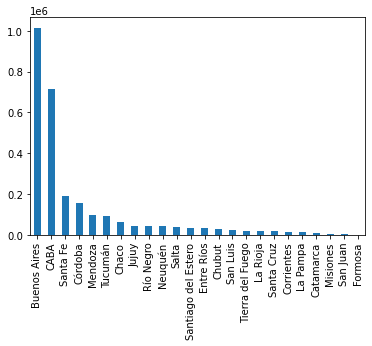

In [21]:
dataset.carga_provincia_nombre.value_counts().plot.bar()
dataset.carga_provincia_nombre.value_counts()

In [22]:
# Feature engineer => agregar columna que tenga un 1 si la pcia de carga es la misma y un 0 sino
dataset['pcia_rec_eq_pcia_car'] = (dataset['residencia_provincia_nombre'] == dataset['carga_provincia_nombre'])
dataset['pcia_rec_eq_pcia_car'] = dataset['pcia_rec_eq_pcia_car'].astype(int)

In [23]:
dataset[['id_evento_caso', 'residencia_provincia_nombre', 'carga_provincia_nombre', 'pcia_rec_eq_pcia_car']]

,id_evento_caso,residencia_provincia_nombre,carga_provincia_nombre,pcia_rec_eq_pcia_car
0,1000000,CABA,Buenos Aires,0
1,1000002,Buenos Aires,Buenos Aires,1
2,1000003,Córdoba,Córdoba,1
3,1000005,Mendoza,Mendoza,1
4,1000006,Buenos Aires,Buenos Aires,1
...,...,...,...,...
2843273,999994,Tierra del Fuego,Tierra del Fuego,1
2843274,999995,Formosa,Formosa,1
2843275,999996,CABA,CABA,1
2843276,999997,CABA,Córdoba,0


In [24]:
#Elimino la columna país porque todos los registros tienen el mismo valor
dataset.drop(['carga_provincia_nombre'], axis=1, inplace=True)

#### Provincia

Buenos Aires           1269459
CABA                    446745
Santa Fe                186627
Córdoba                 159190
Mendoza                  98162
Tucumán                  91611
Chaco                    61411
Río Negro                45059
Jujuy                    44541
Neuquén                  40901
Salta                    40049
Santiago del Estero      35724
Entre Ríos               35598
Chubut                   28069
San Luis                 22407
Tierra del Fuego         21173
Santa Cruz               20524
La Rioja                 20252
Corrientes               15472
La Pampa                 14320
Catamarca                 9243
Misiones                  7129
San Juan                  5967
SIN ESPECIFICAR           5184
Formosa                   1730
Name: residencia_provincia_nombre, dtype: int64

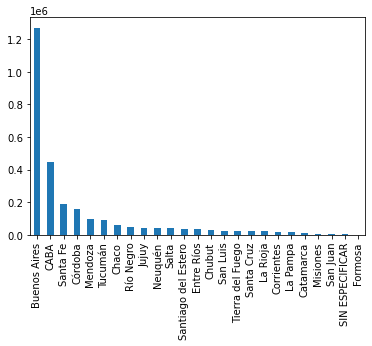

In [25]:
dataset.residencia_provincia_nombre.value_counts().plot.bar()
dataset.residencia_provincia_nombre.value_counts()

In [26]:
dataset.drop(dataset[dataset.residencia_provincia_nombre == "SIN ESPECIFICAR"].index, inplace=True)

In [27]:
### One Hot Encoder
dataset = pd.concat([dataset, pd.get_dummies(dataset['residencia_provincia_nombre'], prefix='residencia_provincia')],axis=1).drop(['residencia_provincia_nombre'], axis=1)

In [28]:
# Rename columns 

columns = {
    'residencia_provincia_Buenos Aires': 'residencia_provincia_buenos_aires',
    'residencia_provincia_CABA': 'residencia_provincia_caba',
    'residencia_provincia_Catamarca': 'residencia_provincia_catamarca',
    'residencia_provincia_Chaco': 'residencia_provincia_chaco',
    'residencia_provincia_Chubut': 'residencia_provincia_chubut',
    'residencia_provincia_corrientes': 'residencia_provincia_corrientes',
    'residencia_provincia_Córdoba': 'residencia_provincia_cordoba',
    'residencia_provincia_Entre Ríos': 'residencia_provincia_entre_rios',
    'residencia_provincia_Formosa': 'residencia_provincia_formosa',
    'residencia_provincia_Jujuy': 'residencia_provincia_jujuy',
    'residencia_provincia_La Pampa': 'residencia_provincia_la_pampa',
    'residencia_provincia_La Rioja': 'residencia_provincia_la_rioja',
    'residencia_provincia_Mendoza': 'residencia_provincia_mendoza',
    'residencia_provincia_Misiones': 'residencia_provincia_misiones',
    'residencia_provincia_Neuquén': 'residencia_provincia_neuquen',
    'residencia_provincia_Río Negro': 'residencia_provincia_rio_negro',
    'residencia_provincia_Salta': 'residencia_provincia_salta',
    'residencia_provincia_San Juan': 'residencia_provincia_san_juan',
    'residencia_provincia_San Luis': 'residencia_provincia_san_luis',
    'residencia_provincia_Santa Cruz': 'residencia_provincia_santa_cruz',
    'residencia_provincia_Santa Fe': 'residencia_provincia_santa_fe',
    'residencia_provincia_Santiago del Estero': 'residencia_provincia_santiago_del_estero',
    'residencia_provincia_Tierra del Fuego': 'residencia_provincia_tierra_del_fuego',
    'residencia_provincia_Tucumán': 'residencia_provincia_tucuman'
}

dataset = dataset.rename(columns=columns)

#### Departamento

In [29]:
dataset.residencia_departamento_nombre.unique().shape

(446,)

In [30]:
# Eliminamos la columna residencia_departamento_nombre
dataset.drop(['residencia_departamento_nombre'], axis=1, inplace=True)

- Se descarta el departamento porque agrega demasiada dispersión (445 nuevas columnas de One Hot Encoder)

#### Eliminamos las columnas de lugares no necesarias: las que incluyen id's

In [31]:
dataset.drop(['carga_provincia_id'], axis=1, inplace=True)
dataset.drop(['residencia_provincia_id'], axis=1, inplace=True)
dataset.drop(['residencia_departamento_id'], axis=1, inplace=True)

### Fechas

#### Análisis de nulos en fechas

In [32]:
print('fecha_inicio_sintomas')
print(dataset.fecha_inicio_sintomas.isnull().value_counts())
print('*' * 50)
print('fecha_apertura')
print(dataset.fecha_apertura.isnull().value_counts())
print('*' * 50)
print('fecha_internacion')
print(dataset.fecha_internacion.isnull().value_counts())
print('*' * 50)
print('fecha_cui_intensivo')
print(dataset.fecha_cui_intensivo.isnull().value_counts())
print('*' * 50)
print('fecha_diagnostico')
print(dataset.fecha_diagnostico.isnull().value_counts())

fecha_inicio_sintomas
False    1444158
True     1277205
Name: fecha_inicio_sintomas, dtype: int64
**************************************************
fecha_apertura
False    2721362
True           1
Name: fecha_apertura, dtype: int64
**************************************************
fecha_internacion
True     2533218
False     188145
Name: fecha_internacion, dtype: int64
**************************************************
fecha_cui_intensivo
True     2693221
False      28142
Name: fecha_cui_intensivo, dtype: int64
**************************************************
fecha_diagnostico
False    2275720
True      445643
Name: fecha_diagnostico, dtype: int64


#### Análisis fechas iguales

#### fecha_inicio_sintomas

In [33]:
cant_ap = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_apertura].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_apertura: ', cant_ap)

cant_int = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_internacion].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_internacion : ', cant_int)

cant_cui = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_cui_intensivo].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_cui_intensivo: ', cant_cui)

cant_di = dataset[dataset.fecha_inicio_sintomas == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_inicio_sintomas y fecha_diagnostico: ', cant_di)

Cantidad iguales fecha_inicio_sintomas y fecha_apertura:  67274
Cantidad iguales fecha_inicio_sintomas y fecha_internacion :  37453
Cantidad iguales fecha_inicio_sintomas y fecha_cui_intensivo:  7274
Cantidad iguales fecha_inicio_sintomas y fecha_diagnostico:  27122


#### fecha_apertura

In [34]:
cant_int_2 = dataset[dataset.fecha_apertura == dataset.fecha_internacion].shape[0]
print('Cantidad iguales fecha_apertura y fecha_internacion: ', cant_int_2)

cant_cui_2 = dataset[dataset.fecha_apertura == dataset.fecha_cui_intensivo ].shape[0]
print('Cantidad iguales fecha_apertura y fecha_cui_intensivo: ', cant_cui_2)

cant_di_2 = dataset[dataset.fecha_apertura == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_apertura y fecha_diagnostico: ', cant_di_2)

Cantidad iguales fecha_apertura y fecha_internacion:  68925
Cantidad iguales fecha_apertura y fecha_cui_intensivo:  7669
Cantidad iguales fecha_apertura y fecha_diagnostico:  790134


#### fecha_internacion

In [35]:
cant_cui_3 = dataset[dataset.fecha_internacion == dataset.fecha_cui_intensivo ].shape[0]
print('Cantidad iguales fecha_internacion y fecha_cui_intensivo: ', cant_cui_3)

cant_di_3 = dataset[dataset.fecha_internacion == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_internacion y fecha_diagnostico: ', cant_di_3)

Cantidad iguales fecha_internacion y fecha_cui_intensivo:  22736
Cantidad iguales fecha_internacion y fecha_diagnostico:  28852


#### fecha_cui_intensivo

In [36]:
cant_di_4 = dataset[dataset.fecha_cui_intensivo == dataset.fecha_diagnostico].shape[0]
print('Cantidad iguales fecha_cui_intensivo y fecha_diagnostico: ', cant_di_4)

Cantidad iguales fecha_cui_intensivo y fecha_diagnostico:  3262


### Creación de columnas

#### fecha_inicio_sintomas

False    1444157
True     1277206
Name: fecha_ap_dif_fecha_in, dtype: int64

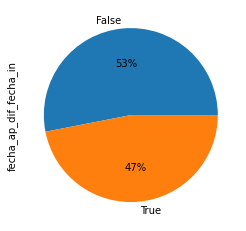

In [37]:
#Crear columna: fecha_apertura - fecha_inicio_sintomas 
dataset['fecha_ap_dif_fecha_in'] = dataset.fecha_apertura - dataset.fecha_inicio_sintomas 
dataset['fecha_ap_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_ap_dif_fecha_in'].isnull().value_counts()

True     2548239
False     173124
Name: fecha_int_dif_fecha_in, dtype: int64

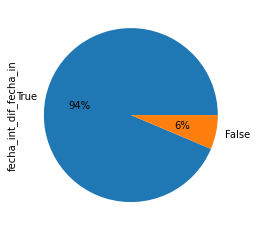

In [38]:
#Crear columna: fecha_internacion - fecha_inicio_sintomas 
dataset['fecha_int_dif_fecha_in'] = dataset.fecha_internacion - dataset.fecha_inicio_sintomas 
dataset['fecha_int_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_int_dif_fecha_in'].isnull().value_counts()

True     2694952
False      26411
Name: fecha_cui_dif_fecha_in, dtype: int64

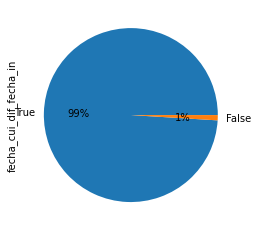

In [39]:
#Crear columna: fecha_cui_intensivo - fecha_inicio_sintomas 
dataset['fecha_cui_dif_fecha_in'] = dataset.fecha_cui_intensivo - dataset.fecha_inicio_sintomas 
dataset['fecha_cui_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_in'].isnull().value_counts()

True     1496615
False    1224748
Name: fecha_di_dif_fecha_in, dtype: int64

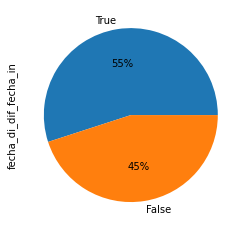

In [40]:
#Crear columna: fecha_diagnostico - fecha_inicio_sintomas 
dataset['fecha_di_dif_fecha_in'] = dataset.fecha_diagnostico  - dataset.fecha_inicio_sintomas 
dataset['fecha_di_dif_fecha_in'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_in'].isnull().value_counts()

#### fecha_apertura 

True     2533218
False     188145
Name: fecha_int_dif_fecha_ap, dtype: int64

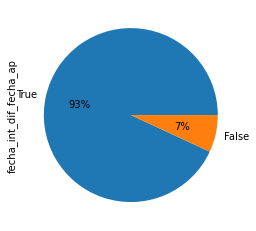

In [41]:
#Crear columna: fecha_internacion - fecha_apertura
dataset['fecha_int_dif_fecha_ap'] = dataset.fecha_internacion - dataset.fecha_apertura 
dataset['fecha_int_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_int_dif_fecha_ap'].isnull().value_counts()

True     2693221
False      28142
Name: fecha_cui_dif_fecha_ap, dtype: int64

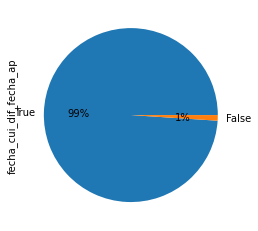

In [42]:
#Crear columna: fecha_cui_intensivo - fecha_apertura
dataset['fecha_cui_dif_fecha_ap'] = dataset.fecha_cui_intensivo - dataset.fecha_apertura
dataset['fecha_cui_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_ap'].isnull().value_counts()

### Elegido: fecha_diagnostico - fecha_apertura

False    2275719
True      445644
Name: fecha_di_dif_fecha_ap, dtype: int64

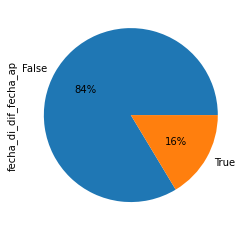

In [43]:
#Crear columna: fecha_diagnostico - fecha_apertura
dataset['fecha_di_dif_fecha_ap'] = dataset.fecha_diagnostico - dataset.fecha_apertura
dataset['fecha_di_dif_fecha_ap'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_ap'].isnull().value_counts()

#### fecha_internacion

True     2693762
False      27601
Name: fecha_cui_dif_fecha_int, dtype: int64

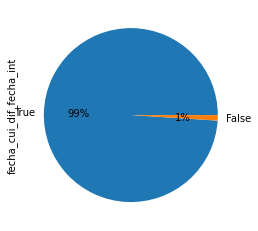

In [44]:
#Crear columna: fecha_cui_intensivo - fecha_internacion
dataset['fecha_cui_dif_fecha_int'] = dataset.fecha_cui_intensivo - dataset.fecha_internacion
dataset['fecha_cui_dif_fecha_int'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_cui_dif_fecha_int'].isnull().value_counts()

True     2545130
False     176233
Name: fecha_di_dif_fecha_int, dtype: int64

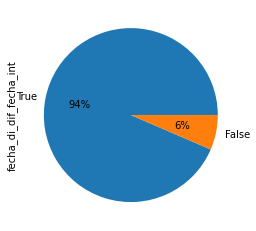

In [45]:
#Crear columna: fecha_diagnostico  - fecha_internacion
dataset['fecha_di_dif_fecha_int'] = dataset.fecha_diagnostico - dataset.fecha_internacion
dataset['fecha_di_dif_fecha_int'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_int'].isnull().value_counts()

#### fecha_cui_intensivo

True     2694986
False      26377
Name: fecha_di_dif_fecha_cui, dtype: int64

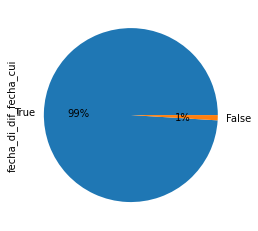

In [46]:
#Crear columna: fecha_cui_intensivo - fecha_apertura
dataset['fecha_di_dif_fecha_cui'] = dataset.fecha_diagnostico - dataset.fecha_cui_intensivo
dataset['fecha_di_dif_fecha_cui'].isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))
dataset['fecha_di_dif_fecha_cui'].isnull().value_counts()

#### Eliminamos las fechas que no vamos a usar: dejamos sólo la columna fecha_di_dif_fecha_ap

In [47]:
dataset.drop(['fecha_inicio_sintomas'], axis=1, inplace=True)
dataset.drop(['fecha_apertura'], axis=1, inplace=True)
dataset.drop(['fecha_internacion'], axis=1, inplace=True)
dataset.drop(['fecha_cui_intensivo'], axis=1, inplace=True)
dataset.drop(['fecha_diagnostico'], axis=1, inplace=True)
dataset.drop(['fecha_ap_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_int_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_in'], axis=1, inplace=True)
dataset.drop(['fecha_int_dif_fecha_ap'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_ap'], axis=1, inplace=True)
dataset.drop(['fecha_cui_dif_fecha_int'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_int'], axis=1, inplace=True)
dataset.drop(['fecha_di_dif_fecha_cui'], axis=1, inplace=True)

dataset.drop(['ultima_actualizacion'], axis=1, inplace=True)

In [48]:
### Eliminamos la fecha de fallecido ya que si la variable target es fallecido, estaríamos introduciendo información a posteriori en el modelo
dataset.drop(['fecha_fallecimiento'], axis=1, inplace=True)

In [49]:
# Eliminamos los registros que no tienen valor en la columna fecha_di_dif_fecha_ap
dataset.drop(dataset[np.isnan(dataset.fecha_di_dif_fecha_ap)].index, inplace=True)

In [50]:
# Transformamos el valor de esta nueva característica en numérico
dataset['fecha_di_dif_fecha_ap'] = dataset['fecha_di_dif_fecha_ap'].astype('timedelta64[D]')

In [51]:
# Para mantener la consistencia, pasamos las diferencias negativas a 0
dataset[dataset.fecha_di_dif_fecha_ap < 0] = 0

### sepi_apertura

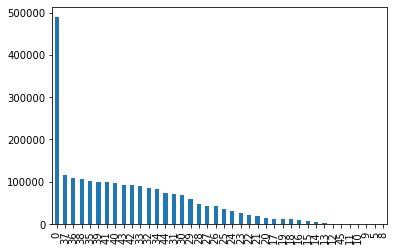

In [52]:
dataset.sepi_apertura.value_counts().plot.bar()

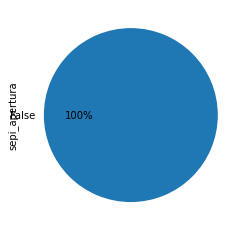

In [53]:
dataset.sepi_apertura.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### cuidado_intensivo

In [54]:
dataset['cuidado_intensivo'].unique()

array(['NO', 0, 'SI'], dtype=object)

In [55]:
# Binarización de la variable
dataset['cuidado_intensivo'] = (dataset['cuidado_intensivo'] == "SI")
dataset['cuidado_intensivo'] = dataset['cuidado_intensivo'].astype(int)

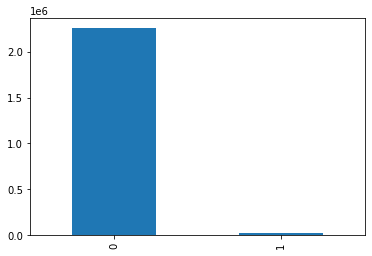

In [56]:
dataset.cuidado_intensivo.value_counts().plot.bar()

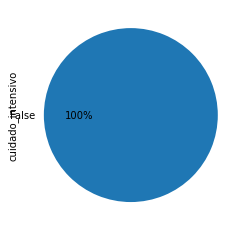

In [57]:
dataset.cuidado_intensivo.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [58]:
dataset.cuidado_intensivo.unique()

array([0, 1])

### asistencia_respiratoria_mecanica 

In [59]:
dataset['asistencia_respiratoria_mecanica'].unique()

array(['NO', 0, 'SI'], dtype=object)

In [60]:
# Binarización de la variable
dataset['asistencia_respiratoria_mecanica'] = (dataset['asistencia_respiratoria_mecanica'] == "SI")
dataset['asistencia_respiratoria_mecanica'] = dataset['asistencia_respiratoria_mecanica'].astype(int)

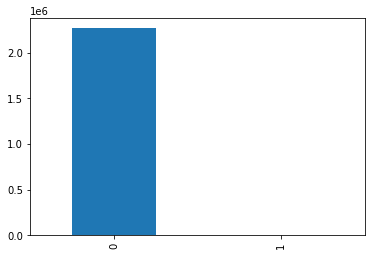

In [61]:
dataset.asistencia_respiratoria_mecanica.value_counts().plot.bar()

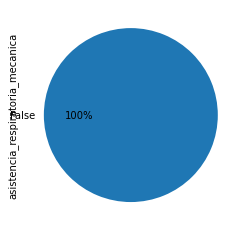

In [62]:
dataset.asistencia_respiratoria_mecanica.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [63]:
dataset.asistencia_respiratoria_mecanica.unique()

array([0, 1])

### origen_financiamiento

In [64]:
dataset.origen_financiamiento.unique()

array(['Privado', 'Público', 0], dtype=object)

In [65]:
dataset.drop(dataset[dataset.origen_financiamiento == "*sin dato*"].index, inplace=True)

In [66]:
dataset['origen_financiamiento'].unique()

array(['Privado', 'Público', 0], dtype=object)

In [67]:
# Binarización de la variable
dataset['origen_financiamiento'] = (dataset['origen_financiamiento'] == "Público")
dataset['origen_financiamiento'] = dataset['origen_financiamiento'].astype(int)

In [68]:
# cambio de nombre de la variable
dataset = dataset.rename(columns={"origen_financiamiento": "financiamiento_publico"})

0    1167959
1    1107760
Name: financiamiento_publico, dtype: int64

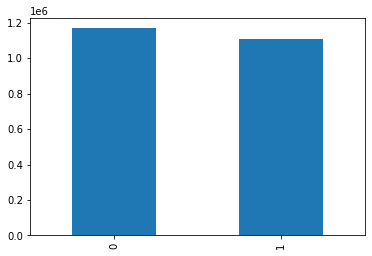

In [69]:
dataset.financiamiento_publico.value_counts().plot.bar()
dataset.financiamiento_publico.value_counts()

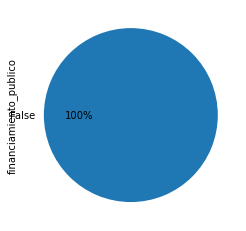

In [70]:
dataset.financiamiento_publico.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### Clasificación (podría usarse como target)

Caso Descartado                                                                               1028622
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                          604346
0                                                                                              489722
Caso confirmado por laboratorio - Activo Internado                                              67123
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                         32805
Caso confirmado por laboratorio - Activo                                                        26248
Caso confirmado por laboratorio - Fallecido                                                     24151
Caso confirmado por criterio clínico-epidemiológico  - No activo (por tiempo de evolución)       2165
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                         299
Caso confirmado por criterio clinico-epidemiológico - Activo                      

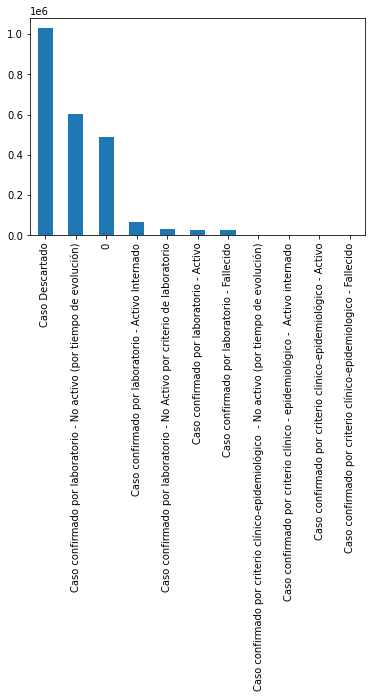

In [71]:
dataset.clasificacion.value_counts().plot.bar()
dataset.clasificacion.value_counts()

Descartado    1028622
Confirmado     757375
0              489722
Name: clasificacion_resumen, dtype: int64

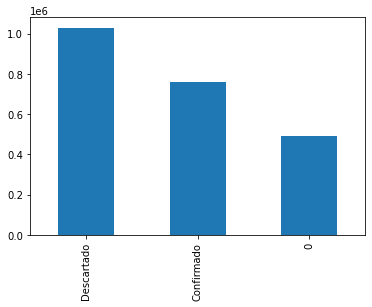

In [72]:
dataset.clasificacion_resumen.value_counts().plot.bar()
dataset.clasificacion_resumen.value_counts()

In [73]:
### Eliminamos los registros que tengan un valor diferente a Descartado o Confirmado (por si aparecen nuevos valores en el futuro)

dataset.drop(dataset[(dataset.clasificacion_resumen != "Descartado") & (dataset.clasificacion_resumen != "Confirmado")].index, inplace=True)

In [74]:
dataset.clasificacion_resumen.unique()

array(['Descartado', 'Confirmado'], dtype=object)

In [75]:
# Binarización de la variable
dataset['clasificacion_resumen'] = (dataset['clasificacion_resumen'] == "Confirmado")
dataset['clasificacion_resumen'] = dataset['clasificacion_resumen'].astype(int)

In [76]:
# cambio de nombre de la variable
dataset = dataset.rename(columns={"clasificacion_resumen": "covid_19_confirmado"})

0    1028622
1     757375
Name: covid_19_confirmado, dtype: int64

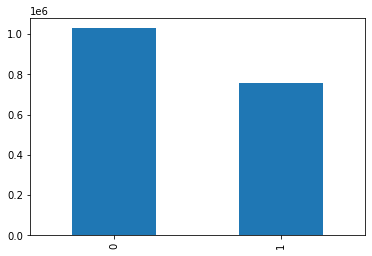

In [77]:
dataset.covid_19_confirmado.value_counts().plot.bar()
dataset.covid_19_confirmado.value_counts()

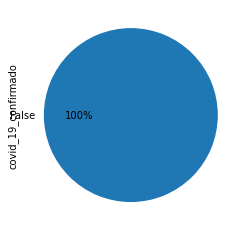

In [78]:
dataset.covid_19_confirmado.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

In [79]:
# Eliminamos la columna clasificacion
dataset.drop(['clasificacion'], axis=1, inplace=True)

### Fallecido (podría usarse como target)

In [80]:
dataset['fallecido'].unique()

array(['NO', 'SI'], dtype=object)

In [81]:
# Binarización de la variable
dataset['fallecido'] = (dataset['fallecido'] == "SI")
dataset['fallecido'] = dataset['fallecido'].astype(int)

0    1762914
1      23083
Name: cuidado_intensivo, dtype: int64


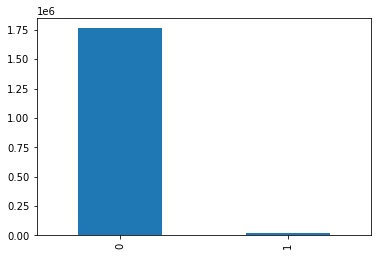

In [82]:
print(dataset.cuidado_intensivo.value_counts())
dataset.cuidado_intensivo.value_counts().plot.bar()

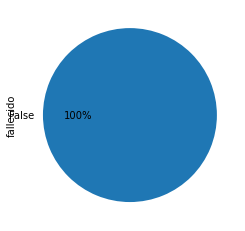

In [83]:
dataset.fallecido.isnull().value_counts().plot.pie(autopct='%1.0f%%', figsize=(4, 4))

### Eliminamos las columnas que no utilizamos

In [84]:
dataset.drop(['id_evento_caso'], axis=1, inplace=True)

## Dataset Limpio y Preprocesado

In [85]:
dataset = dataset.convert_dtypes()

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785997 entries, 0 to 2843277
Data columns (total 36 columns):
 #   Column                                    Dtype
---  ------                                    -----
 0   edad                                      Int64
 1   sepi_apertura                             Int64
 2   cuidado_intensivo                         Int32
 3   fallecido                                 Int32
 4   asistencia_respiratoria_mecanica          Int32
 5   financiamiento_publico                    Int32
 6   covid_19_confirmado                       Int32
 7   sexo_f                                    UInt8
 8   sexo_m                                    UInt8
 9   sexo_nr                                   UInt8
 10  pcia_rec_eq_pcia_car                      Int32
 11  residencia_provincia_buenos_aires         UInt8
 12  residencia_provincia_caba                 UInt8
 13  residencia_provincia_catamarca            UInt8
 14  residencia_provincia_chaco        

In [87]:
dataset

,edad,sepi_apertura,cuidado_intensivo,fallecido,asistencia_respiratoria_mecanica,financiamiento_publico,covid_19_confirmado,sexo_f,sexo_m,sexo_nr,...,residencia_provincia_rio_negro,residencia_provincia_salta,residencia_provincia_san_juan,residencia_provincia_san_luis,residencia_provincia_santa_cruz,residencia_provincia_santa_fe,residencia_provincia_santiago_del_estero,residencia_provincia_tierra_del_fuego,residencia_provincia_tucuman,fecha_di_dif_fecha_ap
0,53,23,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8
1,21,23,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40,23,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,23,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26,23,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843273,39,23,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2843274,34,23,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
2843275,42,23,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2843276,30,23,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Eliminamos los registros que podrían haber quedado con valores nulos

In [88]:
dataset = dataset.dropna()

### Guardamos el dataset limpio y preprocesado

In [89]:
PATH = "./data/"
FILE_NAME = 'covid19_limpio.csv'
FULL_NAME = PATH + FILE_NAME

In [90]:
dataset.to_csv(FULL_NAME, index=False)